# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [109]:
# Carregando as bases de dados salvas da tarefa anterior

X_ = pd.read_csv('/content/Treino_X.csv')

X_test = pd.read_csv('/content/Teste_X.csv')

y_ = pd.read_csv('/content/y_train.txt', header=None)

y_test = pd.read_csv('/content/y_test.txt', header=None)

In [110]:
# Colocando o indice duplo do index e subject

X_ = X_.set_index(['index', 'subject_train'])

X_test = X_test.set_index(['index', 'subject_teste'])

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Teste. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [112]:
X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=.25, random_state=21)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [116]:
# Árvore de classificação com todas as variáveis

caminho = DecisionTreeClassifier(random_state=21, max_depth=4).fit(X_train, y_train)

In [117]:
# feature_importances_ retorna o gini das variáveis

variaveis = caminho.feature_importances_

In [118]:
# Transformando o array em uma lista pois vou precisar do indice da variável e o valor dela

variaveis = variaveis.tolist()

In [119]:
# Dicionário que vai armazenar o indice da variável e o seu respectivo valor.

indice = {}

# Loop para preencher o dicionário

for i in variaveis:
    if i != 0.0:
        indice[variaveis.index(i)] = i

In [120]:
# As variáveis que apresentaram maior valor de gini foram as seguintes:

for i in indice:
    print(f'{X_train.columns[i]}: {indice[i]}')

# As três variáveis que apresentaram o melhor valor foram:

# ('tGravityAcc-min()-X',), ('fBodyAccJerk-bandsEnergy()-1,8',) e ('tGravityAcc-mean()-Y',)

('tGravityAcc-mean()-Y',): 0.16362966104138835
('tGravityAcc-min()-X',): 0.2834564010845776
('tGravityAcc-energy()-Y',): 0.012061495938233784
('tGravityAcc-arCoeff()-Y,1',): 0.12618199522801518
('tBodyGyro-iqr()-X',): 0.005133210171045728
('tBodyGyro-correlation()-Y,Z',): 0.01462151015677785
('tBodyAccMag-std()',): 0.13932974852068877
('fBodyAccJerk-entropy()-X',): 0.2555859778592728


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [121]:
# Antes de construir a árvore de decisão irei criar os dataframes apenas com as variáveis escolhidas.

X0_train = X_train.iloc[:,[0, 1, 43, 54, 383]]
X0_test = X_test.iloc[:,[0, 1, 43, 54, 383]]
X0_valid = X_valid.iloc[:,[0, 1, 43, 54, 383]]

In [123]:
# Construindo a árvore de decisão

caminho = DecisionTreeClassifier(random_state=21).cost_complexity_pruning_path(X0_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [124]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=21, ccp_alpha=ccp_alpha).fit(X0_train, y_train)
    clfs.append(clf)

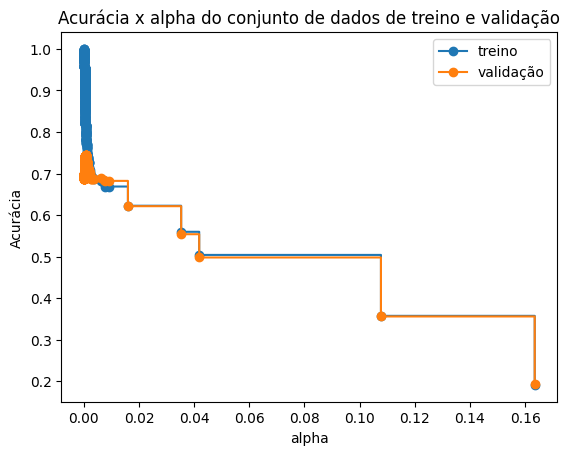

In [125]:
# Plot da acurácia pelo alpha

train_scores = [clf.score(X0_train, y_train) for clf in clfs]
valid_scores = [clf.score(X0_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [126]:
# Encontrando a melhor árvore utilizando o ccp_alpha

ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 74.48


DecisionTreeClassifier(ccp_alpha=0.0006699698141072203, random_state=21)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia: 61.52


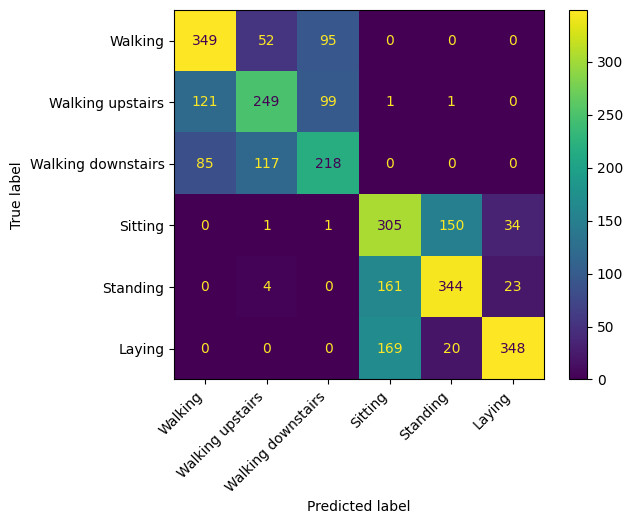

In [128]:
# Aplicando o modelo na base de teste

acuracia_teste = melhor_arvore.score(X0_test, y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
ConfusionMatrixDisplay.from_estimator(melhor_arvore, X0_test, y_test, display_labels=['Walking', 'Walking upstairs', 'Walking downstairs', 'Sitting', 'Standing', 'Laying'])
plt.xticks(rotation=45, ha='right')
plt.show()

## Insights:

A melhor árvore de decisão obtida teve uma acurácia de 74.48%, aplicando a árvore na base de teste a acurácia cai para 61.52%.

Percebe-se que atividades que não requerem movimento e que requerem algum movimento ficaram bem separados. Ao meu ver, o modelo conseguir separar duas categorias de atividade já é um excelente começo, pois agora ele só precisa separar os atividades presentes no grupo.

Comparando com o modelo feito na atividade anterior, o modelo atual está mais preciso.